<a href="https://colab.research.google.com/github/sanjana19991118/python_ml/blob/main/Smoothing%20in%20feature%20enginerring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

# Install 7zip reader [libarchive](https://pypi.python.org/pypi/libarchive)

In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

# Install GraphViz & [PyDot](https://pypi.python.org/pypi/pydot)

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

# Install [cartopy](http://scitools.org.uk/cartopy/docs/latest/)

In [ ]:
!pip install cartopy
import cartopy

In [8]:
# Create the simulated sales dataset
sales = pd.DataFrame({'Date': dates, 'Sales': sales_values})

# Show the first 5 rows of the dataset to students
print("Preview of the Sales Dataset:")
print(sales.head())

Preview of the Sales Dataset:
        Date        Sales
0 2021-01-01   224.835708
1 2021-01-02   417.922493
2 2021-01-03   650.306919
3 2021-01-04   926.458412
4 2021-01-05  1114.750744


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# create simulated sales data with noice

# set seed for reproducibility
np.random.seed(42)

# create a date range
dates=pd.date_range(start='2021-01-01', periods=100)

# generate daily sales wirh trend + noise (more realistic simulation)
# cumulative sum adds trending behaviour, noise simulated real-world daily function

sales_values = np.cumsum(np.random.randn(100)*50 + 200)

# create DataFrame
sales = pd.DataFrame({'Date': dates, 'Sales': sales_values})





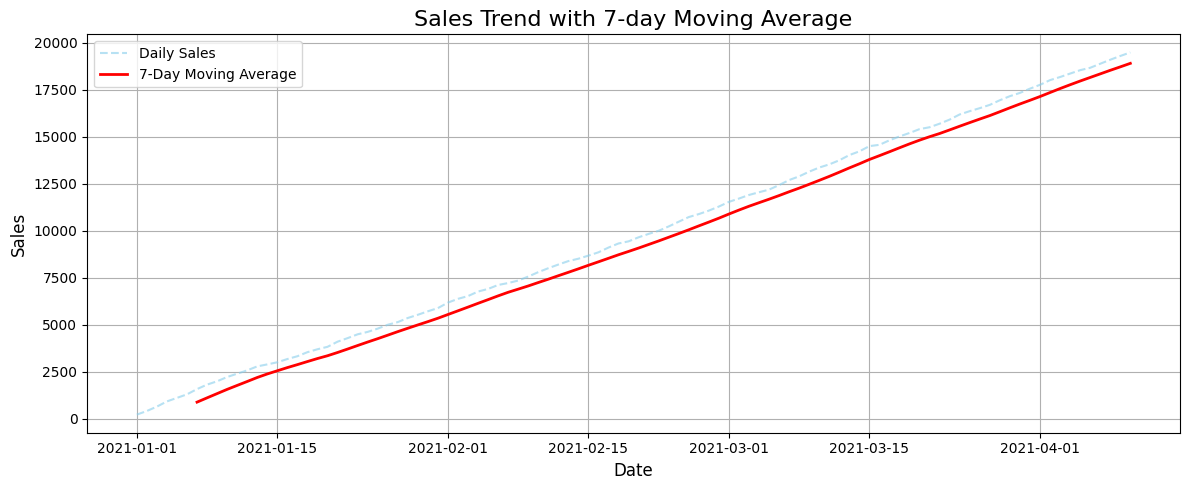

In [10]:
# calculate 7-day Moving average

# Rolling mean smooth the sales data over a 7-day window
sales['Sales_7day_MA'] = sales['Sales'].rolling(window=7).mean()

#  plot the results
plt.figure(figsize=(12,5))

# ploy daily sales(raw, noisy data)
plt.plot(sales['Date'], sales['Sales'], label='Daily Sales', color='skyblue', linestyle='--', alpha=0.6)

# plot 7-day moving average (smooth trend)
plt.plot(sales['Date'], sales['Sales_7day_MA'], label='7-Day Moving Average', color='red', linewidth=2)

plt.title("Sales Trend with 7-day Moving Average", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
#Daily sales(blue dashed): shows real-time variation, includes short-term noise
# 7-day Moving average (red): Smooths the noise, highlights long-term trends.
# Purpose: Helps analysis, decision making, and forecasting

# Analogy:
# - Daily Sales = Daily temperature(fluctuates)
# - 7-day MA = weekly climate pattern(more stable)

# not a lot of variation = over a period of 4 month
# randomess



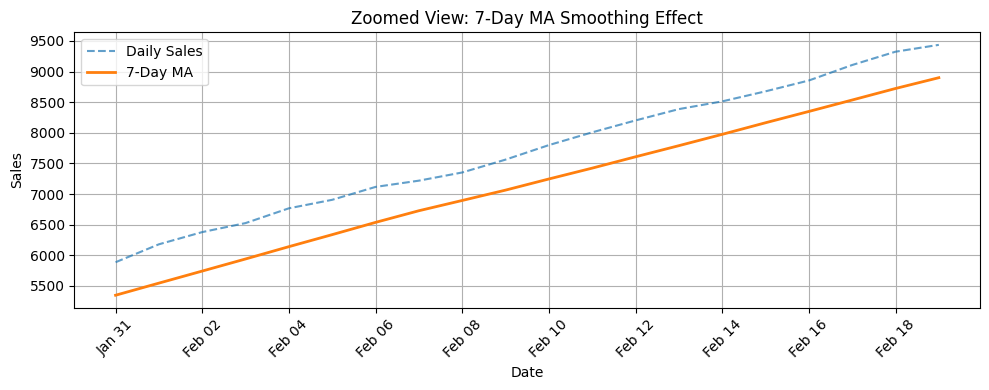

In [11]:
# --------------------------
# Step 4: Zoomed-In Visualization
# --------------------------

# Focus on a smaller time window (e.g., day 30 to day 50)
# This allows closer inspection of how the Moving Average smooths out daily fluctuations
import matplotlib.pyplot as plt
import matplotlib.dates as mdates #Needed for formatting x-axis dates

# Recalculate 7-day Moving average for the current 'sales' DataFrame
sales['Sales_7day_MA'] = sales['Sales'].rolling(window=7).mean()

sales_zoom = sales.iloc[30:50]

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(sales_zoom['Date'], sales_zoom['Sales'], label='Daily Sales', linestyle='--', alpha=0.7)
plt.plot(sales_zoom['Date'], sales_zoom['Sales_7day_MA'], label='7-Day MA', linewidth=2)
plt.title("Zoomed View: 7-Day MA Smoothing Effect")
plt.xlabel("Date")
plt.ylabel("Sales")
# Format the x-axis for better readability
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))  # show every 2nd day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # e.g., Jan 31
plt.xticks(rotation=45)  # tilt labels to avoid overlap

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --------------------------
#Notes: Why Zoomed-In View Matters
# --------------------------

# Purpose of Zooming:
# - Makes it easier to visually compare how the moving average reacts to sharp daily ups and downs.
# - In the full plot, subtle fluctuations are hard to notice. Here, they become clear.

# - The **Daily Sales line** (dashed) shows high volatility — it reacts sharply to changes.
# - The **7-Day Moving Average line** (solid) is smoother and lags slightly behind the daily values.
#   This is expected because it is a backward-looking average over 7 days.

# Key Learning:
# - Moving averages act like "shock absorbers" in noisy data.
# - Helps decision-makers **ignore short-term spikes** and focus on the **long-term trend**.
# - Essential in fields like stock trading, sales forecasting, demand planning, etc.

# Analogy:
# - Daily sales = heartbeat monitor (fast changes)
# - 7-Day MA = overall health trend (slow but stable)

# Engineering Insight:
# - Moving average is a **feature engineering technique** to reduce variance.
# - Helps improve **model performance** by reducing overfitting on noisy data.